In [1]:
import torch
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
checkpoint = torch.load('checkpoints/gppnn_GF2/gppnn_2023_07_25-18_15_08.pth.tar',  map_location=torch.device('cpu'))

In [3]:
tr_metrics = checkpoint['tr_metrics']
val_metrics = checkpoint['val_metrics']
test_metrics = checkpoint['test_metrics']

In [4]:
len(val_metrics)

6

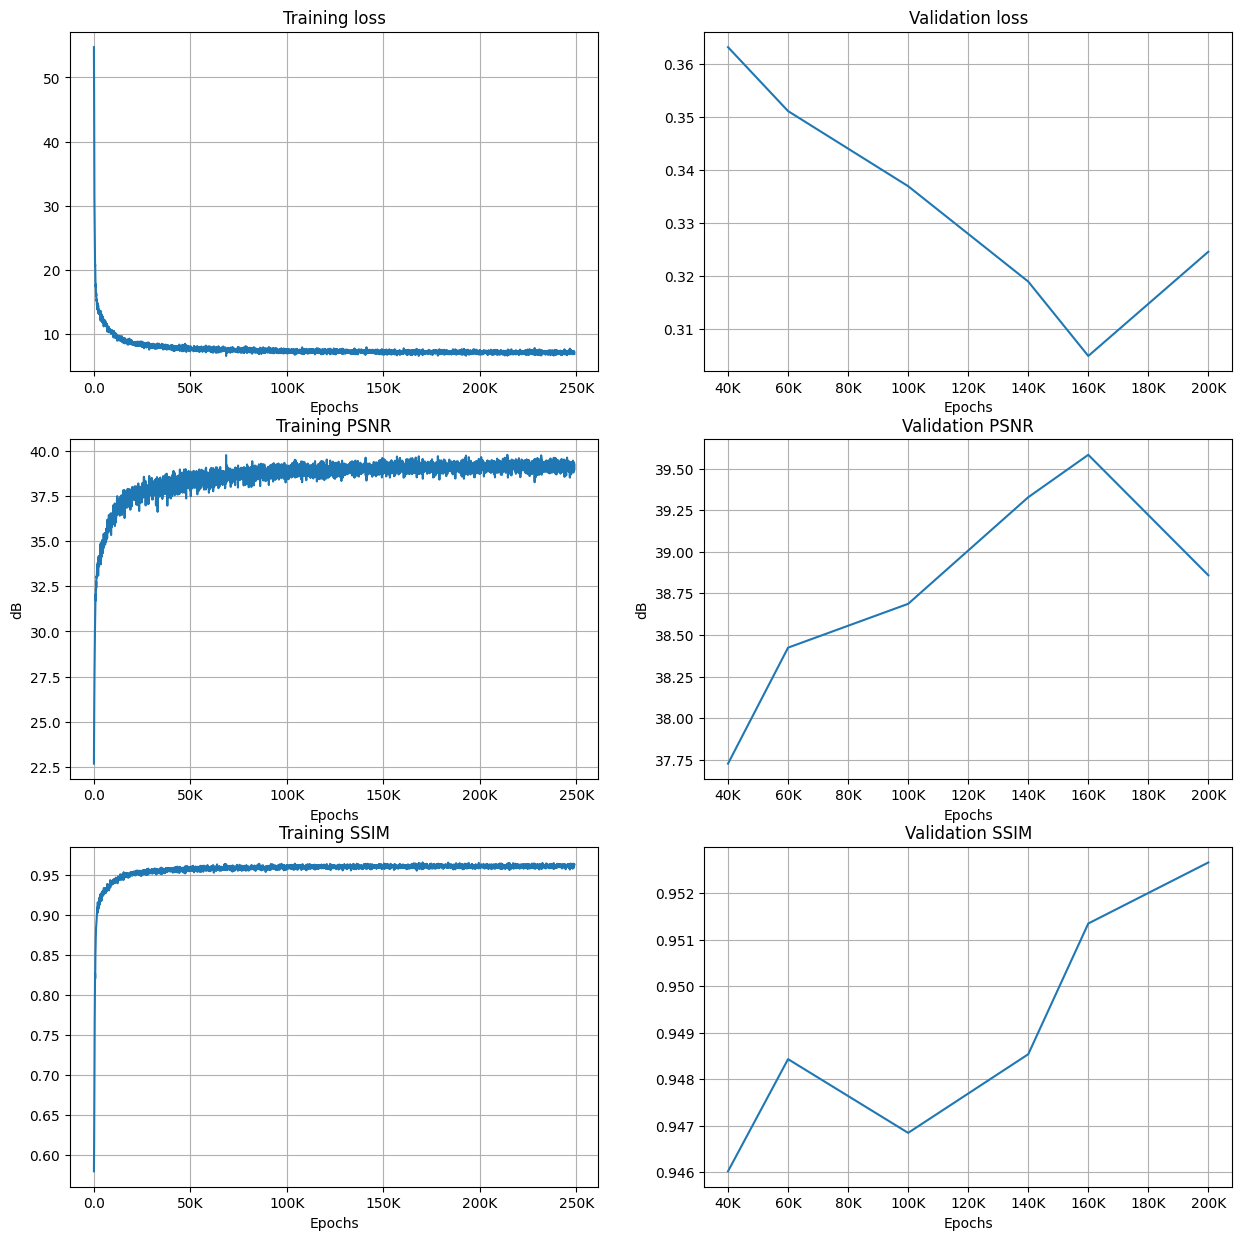

In [5]:
def thousands_formatter(x, pos):
    'The two args are the value and tick position'
    if x == 0:
        return f'{x}'
    return f'{x/1000:.0f}K'

eval_steps = [40000, 60000, 100000,
                      140000, 160000, 200000]
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
tr_range = [i * 50 for i in range(len(tr_metrics))]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
ax[0,0].plot(tr_range, [metric['loss'] for metric in tr_metrics])
ax[0,0].set_title('Training loss')
ax[0,0].grid('on')
ax[0,0].set_xlabel('Epochs')
ax[0,0].xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

ax[0,1].plot(eval_steps, [metric['loss'] for metric in val_metrics])
ax[0,1].set_title('Validation loss')
ax[0,1].xaxis.set_major_formatter(formatter)
ax[0,1].grid('on')
ax[0,1].set_xlabel('Epochs')
ax[0,1].xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))


ax[1,0].plot(tr_range, [metric['psnr'] for metric in tr_metrics])
ax[1,0].set_title('Training PSNR')
ax[1,0].grid('on')
ax[1,0].set_ylabel('dB')
ax[1,0].set_xlabel('Epochs')
ax[1,0].xaxis.set_major_formatter(formatter)
ax[1,0].xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

ax[1,1].plot(eval_steps, [metric['psnr'] for metric in val_metrics])
ax[1,1].set_title('Validation PSNR')
ax[1,1].xaxis.set_major_formatter(formatter)
ax[1,1].grid('on')
ax[1,1].set_ylabel('dB')
ax[1,1].set_xlabel('Epochs')
ax[1,1].xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))


ax[2,0].plot(tr_range, [metric['ssim'] for metric in tr_metrics])
ax[2,0].set_title('Training SSIM')
ax[2,0].grid('on')
ax[2,0].set_xlabel('Epochs')
ax[2,0].xaxis.set_major_formatter(formatter)
ax[2,0].xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

ax[2,1].plot(eval_steps, [metric['ssim'] for metric in val_metrics])
ax[2,1].set_title('Validation SSIM')
ax[2,1].xaxis.set_major_formatter(formatter)
ax[2,1].grid('on')
ax[2,1].set_xlabel('Epochs')
ax[2,1].xaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))


# Set common labels
